In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import torch


In [9]:
A = torch.Tensor([[3,7],[4,9]])
B = torch.Tensor([[6,2],[5,8]])

b = torch.Tensor([[1],[2]])
C = A@B
print(C)
W = C + b
print(W)


tensor([[53., 62.],
        [69., 80.]])
tensor([[54., 63.],
        [71., 82.]])


In [23]:
path = "../project/data"
matches = "/epl_matches_2024_25.csv"
odds = "/epl_odds_2024_25.csv"

df_matches = pd.read_csv(path+matches)
df_matches

,match_id,date,home_team,away_team,result
0,EPL2425_001,2024-08-12,Everton,Liverpool,1
1,EPL2425_002,2024-08-11,West Ham,Newcastle,2
2,EPL2425_003,2024-08-11,Chelsea,Brighton,2
3,EPL2425_004,2024-08-11,Burnley,Arsenal,0
4,EPL2425_005,2024-08-10,Brentford,Fulham,2
...,...,...,...,...,...
375,EPL2425_376,2025-04-28,Man United,Nottingham Forest,1
376,EPL2425_377,2025-04-26,Newcastle,Brentford,1
377,EPL2425_378,2025-04-27,Liverpool,Crystal Palace,2
378,EPL2425_379,2025-04-27,Burnley,Wolves,0


In [24]:
df_odds = pd.read_csv(path+odds)
df_odds

,match_id,date,home_win_odds,draw_odds,away_win_odds
0,EPL2425_001,2024-08-12,4.60,4.93,1.88
1,EPL2425_002,2024-08-11,3.09,5.36,2.26
2,EPL2425_003,2024-08-11,2.19,5.90,3.06
3,EPL2425_004,2024-08-11,3.30,5.06,2.21
4,EPL2425_005,2024-08-10,4.18,3.36,2.41
...,...,...,...,...,...
375,EPL2425_376,2025-04-28,3.34,4.16,2.42
376,EPL2425_377,2025-04-26,2.26,5.67,3.01
377,EPL2425_378,2025-04-27,2.58,4.68,2.85
378,EPL2425_379,2025-04-27,2.58,3.48,3.61


# Decimal Odds

- odd's that are less than 2.0 indicate team is a favorite, else team is the underdog.

In [25]:
df = pd.merge(df_matches, df_odds, on='match_id')

# Favorite or Underdog codes

- 0 , home team odd's > 2.0
  - Home team is the underdog
  - Away team is the favorite

- 1 , home team odd's < 2.0
  - Home team is favorite
  - Away team is the underdog

- (-1)
  - no favorite or underdog


In [26]:
favorite = []

i = 0
for odd in df['home_win_odds']:
    if(odd < 2.0): favorite.append(df['home_team'][i])
    
    elif (odd > 2.0): favorite.append(df['away_team'][i])
    
    else:
        favorite.append(-1)

    i += 1
    
df['favorite'] = favorite
df['favorite']

0              Liverpool
1              Newcastle
2               Brighton
3                Arsenal
4                 Fulham
             ...        
375    Nottingham Forest
376            Brentford
377       Crystal Palace
378               Wolves
379            Tottenham
Name: favorite, Length: 380, dtype: object

In [71]:
df['favorite'].value_counts()

favorite
Everton              25
Brentford            24
Fulham               23
Bournemouth          22
West Ham             20
Wolves               20
Luton                20
Arsenal              20
Chelsea              19
Brighton             19
Liverpool            19
Man United           18
Tottenham            18
Newcastle            18
Man City             17
Sheffield United     17
Crystal Palace       17
Nottingham Forest    17
Burnley              14
Aston Villa          13
Name: count, dtype: int64

In [77]:
subset = df[['home_team','away_team','result','favorite']]
HomeTeam_favs = subset[subset['home_team'] == subset['favorite']]

HomeTeam_favs['favorite'].value_counts()



favorite
Crystal Palace    1
Fulham            1
Chelsea           1
Liverpool         1
Man United        1
Luton             1
Arsenal           1
Brighton          1
Man City          1
Aston Villa       1
Brentford         1
Bournemouth       1
Name: count, dtype: int64

In [78]:
df['result'].value_counts()

result
0    175
2    105
1    100
Name: count, dtype: int64

In [ ]:
## result
# 0: home-Win
# 1: Draw
# 2 Away-Win
# ---------------------------


df['accurate_prediction'] = [0]*df['result'].count()

i = 0
for fav in df['favorite']:
    
    result = df['result'][i]
    
    if(result == 1):
        p = -1
    
    
    # if the favorite team to win is the homeTeam and the actual result was the homeTeam winning
    elif(fav == df['home_team'][i] and result == 0):
        p = 1
    
    # if the favorite team is the awayTeam and the away team won.
    elif(fav == df['away_team'][i] and result == 2):
        p = 1
    else:
        p = 0

    df['accurate_prediction'][i] = p
    i += 1
    
df['accurate_prediction'].value_counts()

In [80]:
df['accurate_prediction'].value_counts()

accurate_prediction
 0    173
 1    107
-1    100
Name: count, dtype: int64

In [4]:
# Load the data
import pandas as pd
df_odds_new = pd.read_csv('../project/data/epl_odds_2024_25.csv')

# Display the distribution of odds
df_odds_new.describe()

,home_win_odds,draw_odds,away_win_odds
count,380.000000,380.000000,380.000000
mean,2.872974,4.299342,2.971868
std,0.575165,0.818925,0.592045
min,1.900000,2.850000,1.840000
25%,2.410000,3.707500,2.507500
50%,2.800000,4.160000,2.920000
75%,3.272500,4.862500,3.332500
max,4.630000,7.260000,4.750000


In [5]:
df_odds_new['odd_sum'] = df_odds_new['home_win_odds'] + df_odds_new['draw_odds'] + df_odds_new['away_win_odds']
df_odds_new.head()

,match_id,date,home_win_odds,draw_odds,away_win_odds,odd_sum
0,EPL2425_001,2024-08-12,4.60,4.93,1.88,11.41
1,EPL2425_002,2024-08-11,3.09,5.36,2.26,10.71
2,EPL2425_003,2024-08-11,2.19,5.90,3.06,11.15
3,EPL2425_004,2024-08-11,3.30,5.06,2.21,10.57
4,EPL2425_005,2024-08-10,4.18,3.36,2.41,9.95


In [6]:
mean_odd_sum = df_odds_new['odd_sum'].mean()
mean_odd_sum

np.float64(10.144184210526317)

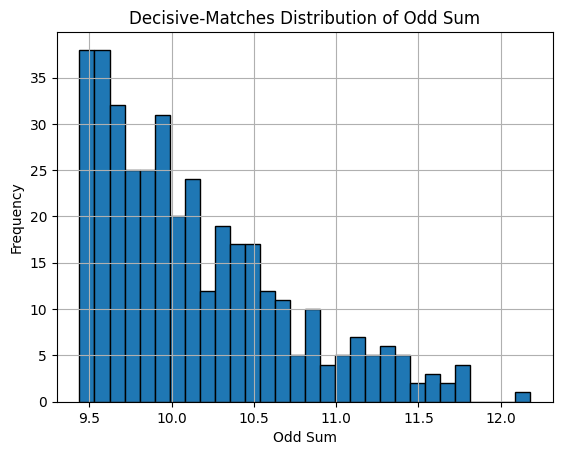

In [28]:
import matplotlib.pyplot as plt

df_odds_new['odd_sum'].hist(bins=30, edgecolor='black')
plt.title('Decisive-Matches Distribution of Odd Sum')
plt.xlabel('Odd Sum')
plt.ylabel('Frequency')
plt.show()

In [29]:
df_matches_new = pd.read_csv('../project/data/epl_matches_2024_25.csv')
df_matches_new.head()

,match_id,date,home_team,away_team,result
0,EPL2425_001,2024-08-12,Everton,Liverpool,1
1,EPL2425_002,2024-08-11,West Ham,Newcastle,2
2,EPL2425_003,2024-08-11,Chelsea,Brighton,2
3,EPL2425_004,2024-08-11,Burnley,Arsenal,0
4,EPL2425_005,2024-08-10,Brentford,Fulham,2


In [30]:
df_matches_new = df_matches_new[df_matches_new['result'] != 1]

# 280 decisive matches 

In [31]:
df_matches_new['result_lbl'] = df_matches_new['result'].apply(lambda x: 'Away-Win' if x == 2 else 'Home-Win' if x == 0 else 'Draw')
df_matches_new.head()

,match_id,date,home_team,away_team,result,result_lbl
1,EPL2425_002,2024-08-11,West Ham,Newcastle,2,Away-Win
2,EPL2425_003,2024-08-11,Chelsea,Brighton,2,Away-Win
3,EPL2425_004,2024-08-11,Burnley,Arsenal,0,Home-Win
4,EPL2425_005,2024-08-10,Brentford,Fulham,2,Away-Win
5,EPL2425_006,2024-08-10,Nottingham Forest,Luton,0,Home-Win


In [32]:
df_combined = pd.merge(df_matches_new, df_odds_new, on='match_id')
df_combined.shape

(280, 11)

# Odds-sum Scatter Plot

### Dataset: decisive-matches
- Contains Only Decisive Matches
- shape: ( 280, 11 )

### Plot Characteristics

- x-axis: Match-index, essentially meaningless
- y-axis: Odd's sum of each Match. $ O_{Tot} = O_H + O_A + O_D$

$$ O_n := \text{ Odds for (n) team, where } n = \{\text{(H):Home, (A): Away, (D): Draw}\} $$




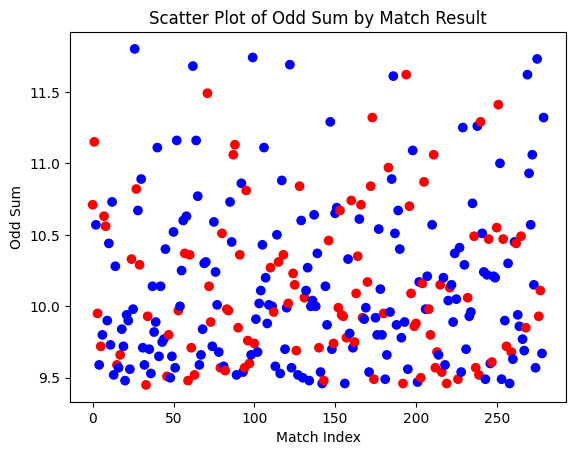

In [33]:
import matplotlib.pyplot as plt

# Define colors based on result_lbl
colors = df_combined['result_lbl'].apply(lambda x: 'blue' if x == 'Home-Win' else 'red')

# Create scatter plot
plt.scatter(df_combined.index, df_combined['odd_sum'], c=colors)
plt.title('Scatter Plot of Odd Sum by Match Result')
plt.xlabel('Match Index')
plt.ylabel('Odd Sum')
plt.show()

In [4]:
import pandas as pd
# Read the data from the text file
with open('Data/message01.txt', 'r') as file:
    data = file.readlines()

# Convert the data to a DataFrame
df_data = pd.DataFrame(data)

# Export the DataFrame to a CSV file
df_data.to_csv('dataC.csv', index=False)